## Aula 01

In [67]:
import pandas as pd

notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [68]:
notas.shape

(100836, 4)

In [69]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [70]:
notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [71]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [72]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [73]:
print("Média das notas:", notas['nota'].mean())
print("Mediana das notas:", notas['nota'].median())

Média das notas: 3.501556983616962
Mediana das notas: 3.5


In [74]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

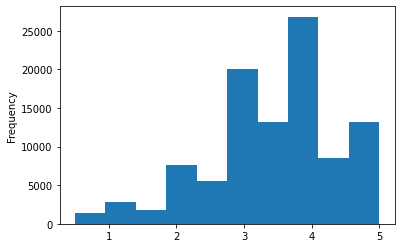

In [75]:
notas.nota.plot(kind='hist')

In [76]:
print("Mediana das notas:", notas['nota'].median())

Mediana das notas: 3.5


In [77]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


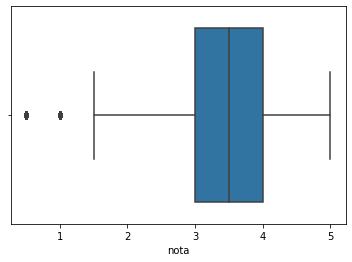

In [78]:
import seaborn as sns

sns.boxplot(notas.nota)

## Aula 02

In [79]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [80]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [81]:
notas.query("filmeId == 1")

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [82]:
notas.query("filmeId == 1").nota

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: nota, Length: 215, dtype: float64

In [83]:
notas.query("filmeId == 1").nota.mean()

3.9209302325581397

In [84]:
notas.query("filmeId == 2").nota.mean()

3.4318181818181817

In [85]:
notas.groupby("filmeId")

In [86]:
notas.groupby("filmeId").mean()

,usuarioId,nota,momento
filmeId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


In [87]:
medias_por_filme = notas.groupby("filmeId").mean().nota
medias_por_filme

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

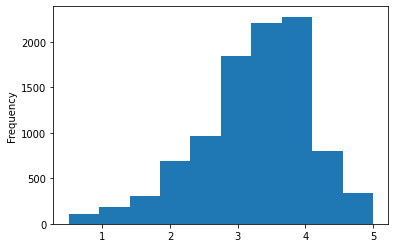

In [88]:
medias_por_filme.plot(kind="hist")

In [89]:
import matplotlib.pyplot as plt

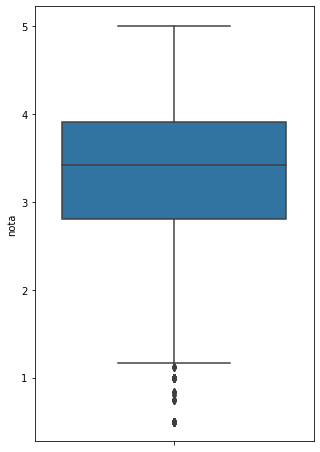

In [90]:
plt.figure(figsize=(5, 8))
sns.boxplot(y=medias_por_filme)

In [91]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

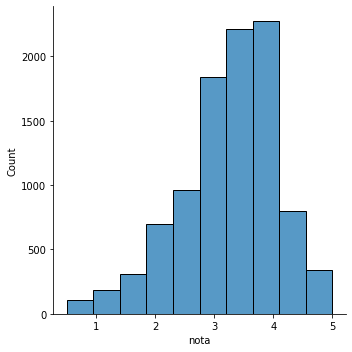

In [92]:
sns.displot(medias_por_filme, bins=10)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

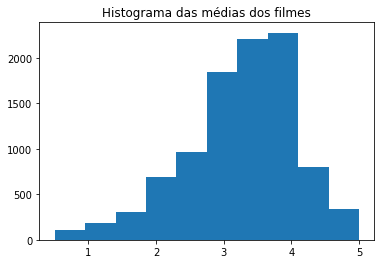

In [93]:
plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

## Aula 03

In [94]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [95]:
tmdb.original_language.unique() # Categorica nominal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [96]:
tmdb.budget.unique() # Quantitativa

array([237000000, 300000000, 245000000, 250000000, 260000000, 258000000,
       280000000, 270000000, 200000000, 255000000, 225000000, 220000000,
       380000000, 215000000, 180000000, 207000000, 209000000, 150000000,
       210000000, 170000000, 190000000, 195000000, 105000000, 185000000,
       175000000, 140000000, 176000003, 178000000, 145000000,  27000000,
       165000000, 160000000,  15000000,  38000000, 155000000, 149000000,
       144000000,  70000000, 100000000, 139000000, 135000000, 130000000,
       137000000, 120000000, 132000000, 110000000, 125000000, 127500000,
       127000000, 103000000,  65000000, 123000000, 115000000, 117000000,
       113000000,  97250400, 116000000, 112000000,  93000000, 107000000,
               0, 133000000, 108000000, 126000000,  90000000, 102000000,
        80000000,  84000000,  99000000,  10000000,  98000000,  94000000,
        85000000,  92000000,  95000000,  79000000,  75000000,  88000000,
        68000000,  20000000,  87000000,  60000000, 

In [97]:
tmdb["original_language"].value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
fa       4
nl       4
he       3
th       3
ta       2
ar       2
ro       2
id       2
cs       2
tr       1
nb       1
no       1
sl       1
el       1
hu       1
af       1
ps       1
ky       1
pl       1
xx       1
te       1
is       1
vi       1
Name: original_language, dtype: int64

In [98]:
tmdb["original_language"].value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ko,11


In [99]:
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


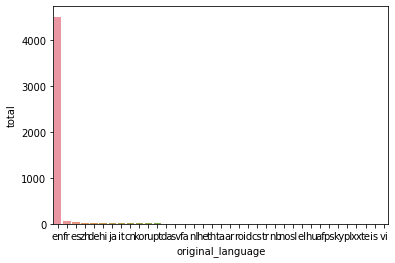

In [100]:
sns.barplot(x="original_language", y="total", data = contagem_de_lingua)

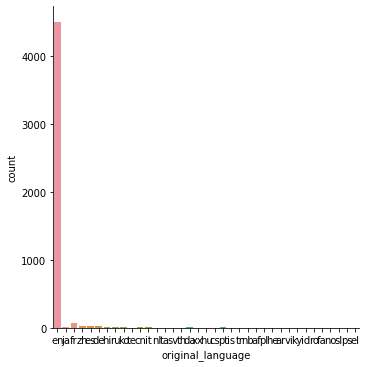

In [101]:
sns.catplot(x = "original_language", kind="count", data = tmdb)

([<matplotlib.patches.Wedge at 0x7f69193454e0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ko'),
  Text(1.0960865535188649, -0.09270527058984593, 'ru'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'fa'),
  Text(1.0990363161210686, -0.04603450713357274, 'nl'),
  Text(1.0992355702663055, -0.04100196411527794, 'he'),
  Text

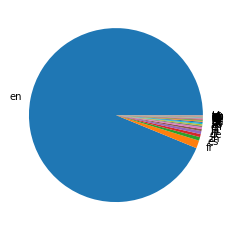

In [102]:
plt.pie(contagem_de_lingua["total"], labels = contagem_de_lingua["original_language"])

In [103]:
total_por_lingua = tmdb.original_language.value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles

print(total_de_ingles)
print(total_do_resto)

4505
298


In [104]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_de_ingles, total_do_resto]
}
dados

{'lingua': ['ingles', 'outros'], 'total': [4505, 298]}

In [105]:
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


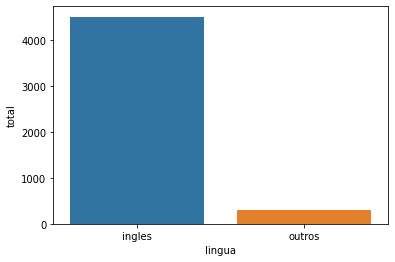

In [106]:
sns.barplot(x = "lingua", y = "total", data = dados)

([<matplotlib.patches.Wedge at 0x7f691926a4e0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

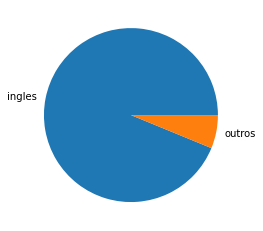

In [107]:
plt.pie(dados["total"], labels = dados["lingua"])

In [108]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'")["original_language"].value_counts()
total_por_lingua_de_outros_filmes

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ru    11
ko    11
pt     9
da     7
sv     5
fa     4
nl     4
th     3
he     3
cs     2
ar     2
ro     2
ta     2
id     2
hu     1
te     1
ky     1
vi     1
af     1
xx     1
el     1
no     1
tr     1
is     1
nb     1
pl     1
ps     1
sl     1
Name: original_language, dtype: int64

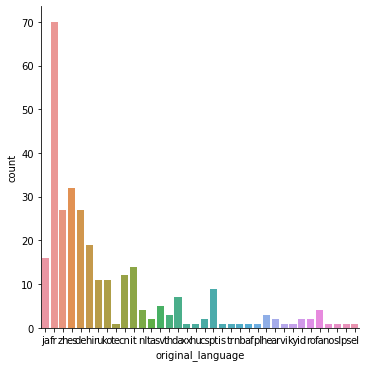

In [109]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
sns.catplot(x = "original_language", kind="count", data = filmes_sem_lingua_original_em_ingles)

# Aula 05

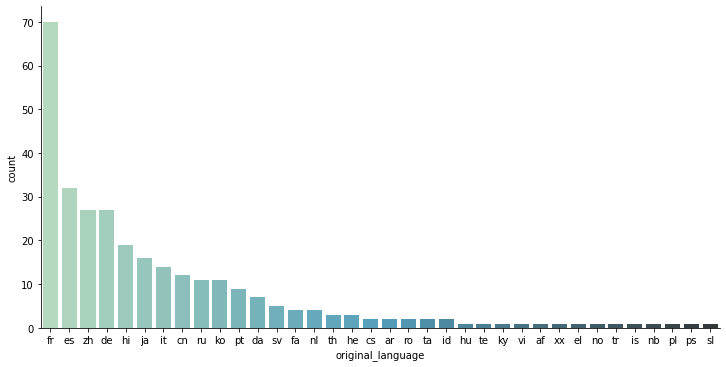

In [110]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
sns.catplot(x = "original_language", kind="count", data = filmes_sem_lingua_original_em_ingles, 
            aspect=2, 
            palette="GnBu_d",
            order=total_por_lingua_de_outros_filmes.index
            )

# Aula 06

In [111]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [112]:
notas_do_toy_story = notas.query("filmeId==1")
notas_do_jumaji = notas.query("filmeId==2")

print(len(notas_do_toy_story), len(notas_do_jumaji))

215 110


In [118]:
print("Nota média do Toy Story %.2f" % notas_do_toy_story.nota.mean())
print("Nota média do Jumaji %.2f" % notas_do_jumaji.nota.mean())

Nota média do Toy Story 3.92
Nota média do Jumaji 3.43


Nota média do Jumaji 3.43


In [119]:
print("Mediana do Toy Story %.2f" % notas_do_toy_story.nota.median())
print("Mediana do Jumaji %.2f" % notas_do_jumaji.nota.median())

Mediana do Toy Story 4.00
Mediana do Jumaji 3.50


In [123]:
import numpy as np

filme1 = np.append(
  np.array([2.5] * 10),
  np.array([3.5] * 10)
)

{'boxes': [<matplotlib.lines.Line2D at 0x7f690f696dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f690f6a5828>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f690f6ad2e8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f690f6a5f28>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f690f6a5128>,
  <matplotlib.lines.Line2D at 0x7f690f6add68>]}

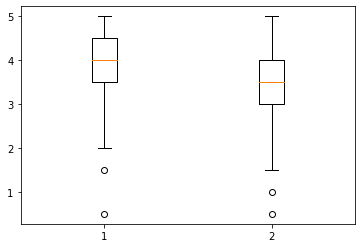

In [126]:
plt.boxplot([notas_do_toy_story.nota, notas_do_jumaji.nota])

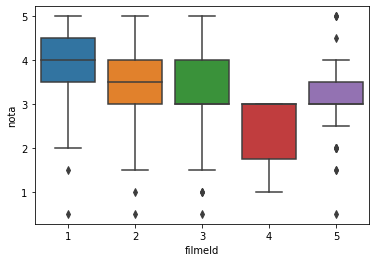

In [128]:
sns.boxplot(x = "filmeId", y = "nota", data = notas.query("filmeId in [1,2,3,4,5]"))

In [130]:
print(notas_do_toy_story.nota.std())
print(notas_do_jumaji.nota.std())

0.8348591407114045
0.8817134921476455
